<a href="https://colab.research.google.com/github/raphateixeira/Sistemas-Dinamicos/blob/Pendulo/Pendulo_Modelagem_e_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np
from IPython.display import Image

O pêndulo simples é dos sistemas dinâmicos mais estudados e conhecidos.

O sistema é composto por uma massa $m$ ligada a um ponto fixo por uma haste rígida de comprimendo $l$ e que oscila devido a ação da gravidade.

A haste forma um ângulo $\alpha$ com o eixo vertical que passa pelo ponto fixo, que descreve a posição angular da massa $m$.

O movimento do pêndulo pode ser visualizado abaixo:

In [ ]:
gifPendulo = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/AnimatedPendulum.gif/512px-AnimatedPendulum.gif.png'
Image(url=gifPendulo)


Para modeloar o comportamento do pêndulo pode-se aplicar a segunda lei de Newton buscando explicar o movimento oscilatório.

Para isso pode-se observar as forças atuando sobre a massa $m$. A força peso $P = mg$ é decomposta em duas componentes (o movimento é em duas dimensões), uma radial ao movimento e outra tangencial, na forma:

$$P = mg = mg\sin(\alpha)i_r + mg\cos(\alpha)i_t $$

Sendo $i_r$ e $i_t$ vetores unitários. 

Note na animação que a força peso é sempre constante em módulo e direção, enquando que suas componentes *oscilam*, variando tanto em direção quanto em intensidade.

A força peso radial $P_r = mg\cos(\alpha)$ está sempre compensando a força de tração da haste, de maneira que a força resultante radial é nula, mantendo o pêndulo sempre em equilíbrio nesta direção.

O movimento oscilatório é de fato gerado pela componente tangencial. Desta forma, aplicando a segunda lei de Newton obtêm-se:

$$m\frac{d^2\alpha}{dt^2} = mgl\sin(\alpha)$$

É curioso notar que o movimento não depende da massa


In [ ]:
# Equações de Estado:
def pendulo(x, t, b, c):
    alfa, omega = x
    dx1dt = alfa
    dx2dt = -b*alfa - c*np.sin(alfa) 
    dxdt = [dx1dt, dx2dt] 
    return dxdt

In [ ]:
# Parâtros:
b = 0.25
c = 5.0

# Condições Iniciais:
x0 = [np.pi - 0.001, 0.0]

# Tempo:
Ts = 0.1;
t = np.arange(0,15,Ts)

In [ ]:
x = odeint(pendulo, x0, t, args=(b, c))

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


array([[ 3.14059265e+000,  0.00000000e+000],
       [ 3.47089167e+000, -2.59309718e-003],
       [ 3.83592853e+000,  1.48349286e-001],
       [ 4.23935665e+000,  4.34235305e-001],
       [ 4.68521368e+000,  8.02751755e-001],
       [ 5.17796191e+000,  1.16311873e+000],
       [ 5.72253292e+000,  1.39388878e+000],
       [ 6.32437696e+000,  1.37230842e+000],
       [ 6.98951749e+000,  1.02936328e+000],
       [ 7.72461146e+000,  4.17337723e-001],
       [ 8.53701594e+000, -2.54509679e-001],
       [ 9.43486174e+000, -6.87664856e-001],
       [ 1.04271348e+001, -7.06653552e-001],
       [ 1.15237662e+001, -5.05693416e-001],
       [ 1.27357312e+001, -6.05548382e-001],
       [ 1.40751598e+001, -1.28164456e+000],
       [ 1.55554572e+001, -2.01013739e+000],
       [ 1.71914390e+001, -2.14873952e+000],
       [ 1.89994784e+001, -2.29816649e+000],
       [ 2.09976710e+001, -3.17857553e+000],
       [ 2.32060153e+001, -3.69406913e+000],
       [ 2.56466132e+001, -4.04782752e+000],
       [ 2

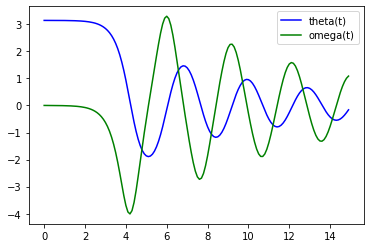

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, x[:, 0], 'b', label='theta(t)')
plt.plot(t, x[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.grid()
plt.show()